In [2]:
#### Interpolation
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import xarray as xr
import seawater as sw
import gsw
import matplotlib.gridspec as gridspec

from icon_smt_levels import dzw, dzt, depthc, depthi

xarray
done xarray


In [76]:
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

13040675
-64.50121309352276
41.00288772689511


In [83]:
#lon0, lat0 = -64.5, 40
lon0, lat0 = -64.5, 39
ic = np.argmin( (clon-lon0)**2 + (clat-lat0)**2 ) 
print(ic); print(clon[ic]); print(clat[ic])

13882903
-64.49992826905338
39.000241014268695


In [77]:
# load interpolated temperature and salinity
path_data    = '/work/mh0033/u241317/smt/T/pp_calc_T.nc'
dt = xr.open_dataset(path_data)
path_data    = '/work/mh0033/u241317/smt/S/pp_calc_S.nc'
ds = xr.open_dataset(path_data)

In [94]:
so = ds.isel(cc=ic).S.data
to = dt.isel(cc=ic).T.data

In [33]:
interp_coef = 1/(depthc[1:]-depthc[:-1]) * (depthi[1:-1] - depthc[:-1])
to.shape

(112,)

In [95]:
toi = to[:-1] + (to[1:]-to[:-1])* (1/(depthc[1:]-depthc[:-1]) * (depthi[1:-1] - depthc[:-1]))

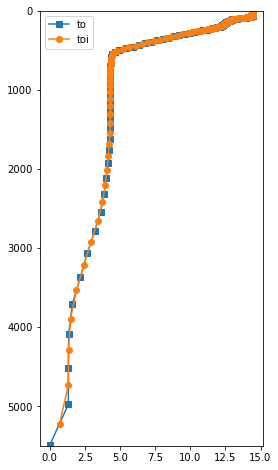

In [43]:
ylim = [5500,0]

fig, ax = plt.subplots(figsize=(4,8))
ax.plot(to, depthc, label="to", marker="s")
ax.plot(toi, depthi[1:-1], marker="o", label="toi")
#ax.set_xlim([-2e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

### buoyancy

In [44]:
g     = 9.80665
rho0  = 1025.022

In [113]:
rho  = gsw.rho(so[:], to[:], depthc[:])
rhoi = gsw.rho(so[:], to[:], depthi[1:])

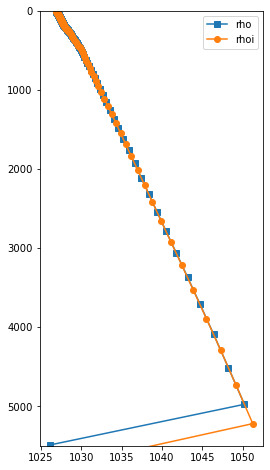

In [114]:
ylim = [5500,0]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(rho, depthc, label="rho", marker="s")
ax.plot(rhoi, depthi[1:], marker="o", label="rhoi")
#ax.set_xlim([-2e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [115]:
bc     = - g * (rho - rho0)/rho0
bc_inter = bc[:-1] + (bc[1:] - bc[:-1])*interp_coef[:]
bi     = - g * (rhoi - rho0)/rho0

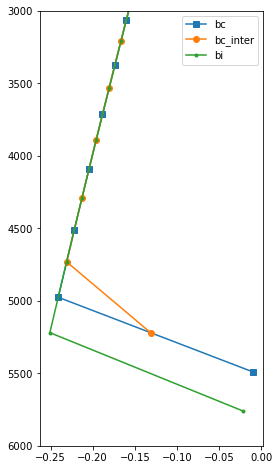

In [116]:
ylim = [6000,3000]
fig, ax = plt.subplots(figsize=(4,8))
ax.plot(bc, depthc, label="bc", marker="s")
ax.plot(bc_inter, depthi[1:-1], marker="o", label="bc_inter")
ax.plot(bi, depthi[1:], label="bi", marker=".")
#ax.set_xlim([-2e-5,1e-4])
ax.set_ylim(ylim)
ax.legend()

In [61]:
bi[90]

-0.06347804240769887

In [62]:
bc_inter[90]

-0.0635112912276133

In [103]:
bi[100]-bc_inter[100]

7.130041570933832e-05

In [102]:
l2 = np.sqrt((bi[:-2]-bc_inter[:-1])**2)
l2e = np.sum(l2)/l2.size
l2e

5.559424925843839e-05

In [108]:
bi[-1] = np.NaN

In [109]:
bi.shape

(112,)

In [110]:
bi[111]

nan